# **Customer Churn**

* Churn: When customers leave a service provider for an alternative (competing) service provider
* Aim: Predict which customers will churn
* Dataset: `Telco Customer Churn` hosted by Kaggle

In [ ]:
data_link='https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# **Import Relevant Libraries**

In [ ]:
# Standard imports

import pandas as pd

import numpy as np

# Import pycaret

!pip install pycaret

from pycaret.classification import *

# **Load Data**

In [ ]:
data = pd.read_csv(data_link)
data.head(5)
for col in data.columns:
  print(col)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


# **Data Preparation & EDA**

### Response Variable: Churn

In [ ]:
# Set Churn Yes = 1

data.loc[data['Churn']=='Yes','Churn']=1

# Set Churn No = 0

data.loc[data['Churn']=='No','Churn']=0


### Explanatory Variables - determine which variables need to be converted to dummy variables (i.e. those with more than 2 categories)

In [ ]:
# All Customers are unique ie no duplicates

len(data['customerID'].unique())

#Check if dataset is balanced

print ("Clients who HAVE churned {}".format(data.loc[data['Churn']==1].shape[0]))

print ("Clients who HAVE NOT churned {}".format(data.loc[data['Churn']==0].shape[0]))


Clients who HAVE churned 1869
Clients who HAVE NOT churned 5174


In [ ]:
#Metrics to evaluate model: Recall, Precision, F1 Score

In [ ]:
# Convert Total Charges to numeric and SeniorCitizen to object (Categorical)

# original_columns=[]

# for col in data.columns:
  
#  if col=='TotalCharges':
    
#    data.TotalCharges = pd.to_numeric(data['TotalCharges'],errors='coerce')
  
#  elif col=='SeniorCitizen':
    
#    data.SeniorCitizen = data.SeniorCitizen.astype('object')

# Convert Categorical Variable to dummy variables

# for col in data.columns:

#  if data[col].dtype.name=='object':

#    if col=='Churn':

#      data.loc[data.Churn=='Yes','Churn'] = 1

#      data.loc[data.Churn=='No','Churn'] = 0

    
#    elif col=='customerID':
      
#      print ('Churn and customerID need no conversion')

#      original_columns.append(col)  
    
#    else:

#      original_columns.append(col)
      
#      print(col + ' is a CATEGORICAL variable with {} unique values'.format(len(data[col].unique())))
      
#      print(data[col].unique())
   
#      dummies = pd.get_dummies(data[col],prefix=col) # Create dummy columns
   
#      data = data.merge(dummies,left_index=True,right_index=True) # Merge with dummy data

#      print('\n')

#  else:
    
#    print(col + ' is a NUMERICAL variable' + '\n')


# Return original data dataframe without original_columns

# data = data[[col for col in data.columns if col not in original_columns]]

Churn and customerID need no conversion
gender is a CATEGORICAL variable with 2 unique values
['Female' 'Male']


SeniorCitizen is a CATEGORICAL variable with 2 unique values
[0 1]


Partner is a CATEGORICAL variable with 2 unique values
['Yes' 'No']


Dependents is a CATEGORICAL variable with 2 unique values
['No' 'Yes']


tenure is a NUMERICAL variable

PhoneService is a CATEGORICAL variable with 2 unique values
['No' 'Yes']


MultipleLines is a CATEGORICAL variable with 3 unique values
['No phone service' 'No' 'Yes']


InternetService is a CATEGORICAL variable with 3 unique values
['DSL' 'Fiber optic' 'No']


OnlineSecurity is a CATEGORICAL variable with 3 unique values
['No' 'Yes' 'No internet service']


OnlineBackup is a CATEGORICAL variable with 3 unique values
['Yes' 'No' 'No internet service']


DeviceProtection is a CATEGORICAL variable with 3 unique values
['No' 'Yes' 'No internet service']


TechSupport is a CATEGORICAL variable with 3 unique values
['No' 'Yes' 'No internet

# **Remove redundant Categorical Variable options and Split data into train/test set**

In [ ]:
# For dummy variables with 2 options we don't need both. We only need one as the other will be mirror image e.g. male/female.
# So we can drop one of the variables e.g. gender_Female and gender_Male we only need one

#data=data[['tenure',
#           'MonthlyCharges', 'TotalCharges',
#           'Churn',
#           'gender_Male',
#           'SeniorCitizen_0',
#           'Partner_Yes',
#           'Dependents_Yes',
#           'PhoneService_Yes',
#           'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes',
#           'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
#           'OnlineSecurity_No','OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
#           'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes',
#           'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes',
#           'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
#           'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
#           'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes',
#           'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
#           'PaperlessBilling_Yes',
#           'PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

# **Setup PyCaret with relevant steps**

* Normalise numerical features using Z-Score
* Remove Outliers
* Remove MultiCollinear features
* Feature Selection to highlight most important
* Use SMOTE to FIX Imbalances

> **NB: PyCaret can deal with categorical variables (we don't need to create dummies) as long as we specify which are the Categorical Variables**

> Complete List here: https://pycaret.org/setup/

In [ ]:
categorical_features=[col for col in data.columns if col not in ['tenure','MonthlyCharges', 'TotalCharges','Churn']]

categorical_features=['gender','SeniorCitizen','Partner','Dependents','PhoneService',
                      'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                      'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

data.TotalCharges = pd.to_numeric(data['TotalCharges'],errors='coerce')

data.SeniorCitizen = data.SeniorCitizen.astype('object')

setup_with_relevant_steps = setup(data=data,
                                  target="Churn",
                                  ignore_features=['customerID'], 
                                  session_id=1,
                                  remove_outliers=True,
                                  numeric_features=['tenure','MonthlyCharges', 'TotalCharges'], 
                                  normalize=True,normalize_method='zscore',
                                  train_size=0.7,
                                  data_split_shuffle=True,
                                  fix_imbalance=True,
                                  categorical_features=categorical_features,
                                  remove_multicollinearity=True,
                                  feature_selection=True)

,Description,Value
0,session_id,1
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 21)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


# **Build and Compare Many Models**

In [ ]:
# Compare Models and sort by Accuracy

compare_models(fold=10, sort="Accuracy")

# Pull the Score Grid of compare_models as a dataframe

best_model_results = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7833,0.8279,0.5910,0.6164,0.6027,0.4539,0.4546,7.546
gbc,Gradient Boosting Classifier,0.7828,0.8385,0.6654,0.6008,0.6306,0.4776,0.4795,1.005
lightgbm,Light Gradient Boosting Machine,0.7775,0.8235,0.5926,0.6027,0.5965,0.4432,0.4439,0.277
rf,Random Forest Classifier,0.7754,0.8143,0.5841,0.6005,0.5912,0.4366,0.4374,1.013
xgboost,Extreme Gradient Boosting,0.7719,0.8102,0.5718,0.5946,0.5819,0.4254,0.4263,6.047
ada,Ada Boost Classifier,0.7651,0.8380,0.7253,0.5612,0.6324,0.4641,0.4726,0.370
et,Extra Trees Classifier,0.7606,0.7870,0.5265,0.5770,0.5498,0.3874,0.3887,0.972
lr,Logistic Regression,0.7440,0.8348,0.7821,0.5275,0.6297,0.4453,0.4658,0.162
ridge,Ridge Classifier,0.7388,0.0000,0.7790,0.5211,0.6242,0.4361,0.4570,0.080
lda,Linear Discriminant Analysis,0.7380,0.8312,0.7775,0.5201,0.6230,0.4343,0.4551,0.107


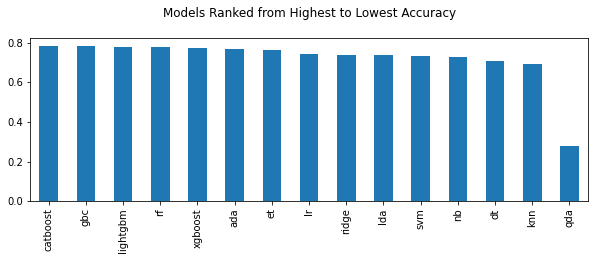

In [ ]:
best_model_results.Accuracy.plot(kind='bar',title='Models Ranked from Highest to Lowest Accuracy\n',figsize=(10,3))

# **Recreate the best Model and tune it**

In [ ]:
best_model = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7676,0.8187,0.5954,0.5821,0.5887,0.4267,0.4268
1,0.8038,0.8579,0.5878,0.6696,0.6260,0.4938,0.4958
2,0.7676,0.8090,0.5420,0.5917,0.5657,0.4075,0.4082
3,0.7415,0.7914,0.5308,0.5349,0.5328,0.3541,0.3541
4,0.7885,0.8302,0.5538,0.6372,0.5926,0.4507,0.4527
5,0.8141,0.8694,0.6385,0.6748,0.6561,0.5289,0.5293
6,0.7991,0.8243,0.6538,0.6343,0.6439,0.5041,0.5042
7,0.7842,0.8311,0.5923,0.6160,0.6039,0.4557,0.4559
8,0.7756,0.8145,0.6308,0.5899,0.6097,0.4525,0.4530
9,0.7906,0.8322,0.5846,0.6333,0.6080,0.4655,0.4661


In [ ]:
best_model_tuned = tune_model(best_model, fold=10, optimize="Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7825,0.8395,0.6718,0.5986,0.6331,0.4793,0.4809
1,0.8102,0.8656,0.6489,0.6641,0.6564,0.5253,0.5254
2,0.7825,0.8267,0.6336,0.6058,0.6194,0.4673,0.4675
3,0.7479,0.8064,0.6154,0.5405,0.5755,0.3973,0.3990
4,0.7906,0.8385,0.6308,0.6212,0.6260,0.4806,0.4806
5,0.8269,0.8740,0.7308,0.6738,0.7011,0.5796,0.5805
6,0.7842,0.8314,0.7077,0.5935,0.6456,0.4922,0.4961
7,0.7799,0.8437,0.6462,0.5957,0.6199,0.4654,0.4662
8,0.7543,0.8246,0.6692,0.5472,0.6021,0.4269,0.4314
9,0.7970,0.8393,0.7154,0.6159,0.6619,0.5180,0.5210


In [ ]:
plot_model(best_model_tuned, plot="parameter")

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,130
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


# **Compare Best Model with Ensemble Model**

In [ ]:
list_of_models=[model for model in models().index] #SGDClassifier doesn't have probabilities so will not work with soft probabilities method

list_of_models=['lr','knn','nb','dt','rbfsvm','rf','lda']

ensemble_using_blending = blend_models(estimator_list=[create_model(model) for model in list_of_models],method="soft")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7548,0.8257,0.7405,0.5449,0.6278,0.4512,0.4630
1,0.7804,0.8349,0.7405,0.5843,0.6532,0.4958,0.5032
2,0.7655,0.8195,0.7405,0.5607,0.6382,0.4695,0.4794
3,0.7158,0.7823,0.7000,0.4919,0.5778,0.3733,0.3865
4,0.7628,0.8237,0.7077,0.5576,0.6237,0.4541,0.4610
5,0.7842,0.8506,0.8077,0.5801,0.6752,0.5201,0.5360
6,0.7479,0.8144,0.7615,0.5323,0.6266,0.4451,0.4614
7,0.7671,0.8470,0.7769,0.5580,0.6495,0.4820,0.4969
8,0.7372,0.8088,0.7538,0.5185,0.6144,0.4252,0.4424
9,0.7543,0.8288,0.7231,0.5434,0.6205,0.4441,0.4541


### **Ensemble model doesn't perform as good as Catboost model!**

In [ ]:
# Best tuned model prediction

predict_model(best_model_tuned);

# Ensemble Model prediction

predict_model(ensemble_using_blending);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7965,0.861,0.7027,0.5761,0.6331,0.4942,0.4989


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7653,0.8482,0.7898,0.52,0.6271,0.4662,0.4879
